In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

#### 1.Problem_Statement

In [ ]:
To predict telecom customer churning based on following features:
    

#### 2.Reading_Dataset

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### 3.Exploratory_Data_Analysis

In [3]:
# dataset shape
df.shape

(7043, 21)

In [4]:
# missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# statistcal information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
# target column
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### 4.Feature_Engineering

In [12]:
# drop unnecessary column
# customer id column is of no use so we will drop it
df.drop("customerID",axis=1,inplace = True)

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
# encoding categorical variables
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df["gender"].replace({'Male': 0, 'Female': 1},inplace = True)

In [39]:
df["Partner"].replace({'No': 0, 'Yes': 1},inplace = True)

In [41]:
df["Dependents"].replace({'No': 0, 'Yes': 1},inplace = True)

In [42]:
df["PhoneService"].replace({'No': 0, 'Yes': 1},inplace = True)

In [43]:
df["MultipleLines"].replace({'No': 0, 'Yes': 1,'No phone service': 2},inplace = True)


In [44]:
df["InternetService"].replace({'Fiber optic': 0, 'DSL': 1,'No': 2},inplace = True)


In [45]:
df["OnlineSecurity"].replace({'No': 0, 'Yes': 1,'No internet service': 2},inplace = True)


In [46]:
df["OnlineBackup"].replace({'No': 0, 'Yes': 1,'No internet service': 2},inplace = True)


In [60]:
df["DeviceProtection"].replace({'No': 0, 'Yes': 1,"No internet service":2},inplace = True)


In [48]:
df["TechSupport"].replace({'No': 0, 'Yes': 1,'No internet service': 2},inplace = True)


In [49]:
df["StreamingTV"].replace({'No': 0, 'Yes': 1,'No internet service': 2},inplace = True)


In [50]:
df["StreamingMovies"].replace({'No': 0, 'Yes': 1,'No internet service': 2},inplace = True)


In [51]:
df["Contract"].replace({'Month-to-month': 0, 'Two year': 1, 'One year': 2},inplace = True)

In [53]:
df["PaperlessBilling"].replace({'Yes': 0, 'No': 1},inplace=True)


In [55]:
df["Churn"].replace({'No': 0, 'Yes': 1},inplace=True)

In [78]:
count = 0
for i in df.TotalCharges:
    if i == " ":
        count+1
print("count of empty string :",count)

# replace empty string with nan values
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
# type casting totalcharges column
df["TotalCharges"] = df["TotalCharges"].astype(float)

count of empty string : 0


In [79]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [81]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [82]:
# total charges column has missing values so we will fill it with mean of total charges column
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [83]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# now our data set has no missing values

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.495244,0.500013,0.00,0.000,0.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,3525.555161,119.439655,3402.00,3402.000,3641.00,3641.00,3641.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
MultipleLines,7043.0,0.615505,0.656039,0.00,0.000,1.00,1.00,2.00
InternetService,7043.0,0.777084,0.778877,0.00,0.000,1.00,1.00,2.00
OnlineSecurity,7043.0,0.720006,0.796885,0.00,0.000,1.00,1.00,2.00
OnlineBackup,7043.0,0.778220,0.778472,0.00,0.000,1.00,1.00,2.00


In [85]:
# will assign features to x variable and target to y variable
x = df.drop("Churn",axis = 1)
y = df["Churn"]

In [86]:
# splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [87]:
# standardizing dataset
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [88]:
x_train_scaled.shape,x_test_scaled.shape

((5634, 19), (1409, 19))

#### 5.Model_Building(Creating_ANN)

In [90]:
model = keras.Sequential([
    keras.layers.Dense(19,input_shape=(19,),activation = "relu"),
    keras.layers.Dense(15,activation= "relu"),
    keras.layers.Dense(10,activation= "relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [91]:
# model compilation
model.compile(optimizer="adam",
             loss = "binary_crossentropy",
             metrics=["accuracy"])

In [94]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False)

In [112]:
# model training
history = model.fit(x_train_scaled,y_train,validation_split = 0.33,batch_size = 10,epochs=100,callbacks=early_stopping)

Epoch 1/100
378/378 [==============================] - 2s 4ms/step - loss: 0.3065 - accuracy: 0.8635 - val_loss: 0.4110 - val_accuracy: 0.8102
Epoch 2/100
378/378 [==============================] - 1s 4ms/step - loss: 0.3043 - accuracy: 0.8606 - val_loss: 0.4176 - val_accuracy: 0.8215
Epoch 3/100
378/378 [==============================] - 1s 4ms/step - loss: 0.3036 - accuracy: 0.8606 - val_loss: 0.4196 - val_accuracy: 0.8226
Epoch 4/100
378/378 [==============================] - 1s 4ms/step - loss: 0.3027 - accuracy: 0.8588 - val_loss: 0.4143 - val_accuracy: 0.8102
Epoch 5/100
378/378 [==============================] - 2s 4ms/step - loss: 0.3017 - accuracy: 0.8609 - val_loss: 0.4139 - val_accuracy: 0.8204
Epoch 6/100
378/378 [==============================] - 1s 4ms/step - loss: 0.3017 - accuracy: 0.8598 - val_loss: 0.4196 - val_accuracy: 0.8210
Epoch 7/100
378/378 [==============================] - 1s 4ms/step - loss: 0.2973 - accuracy: 0.8638 - val_loss: 0.4433 - val_accuracy: 0.8194

In [119]:
print(model.evaluate(x_test_scaled,y_test))
print(model.evaluate(x_train_scaled,y_train))

45/45 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.7622
[0.6147918105125427, 0.7622427344322205]
177/177 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8520
[0.33619987964630127, 0.8519701957702637]


#### 6.Model_Evaluation

In [113]:
# test_data
y_pred_test = model.predict(x_test_scaled)
y_pred_test = (y_pred_test>= 0.5)

acc_score = accuracy_score(y_pred_test,y_test)
print("Accuracy_Score :", acc_score)
print("****************************")

cnf_matrix = confusion_matrix(y_pred_test,y_test)
print("Confusion_Matrix :\n", cnf_matrix)
print("****************************")

clf_report = classification_report(y_pred_test,y_test)
print("Classification_Report :\n", clf_report)

45/45 [==============================] - 0s 2ms/step
Accuracy_Score : 0.7622427253371186
****************************
Confusion_Matrix :
 [[864 136]
 [199 210]]
****************************
Classification_Report :
               precision    recall  f1-score   support

       False       0.81      0.86      0.84      1000
        True       0.61      0.51      0.56       409

    accuracy                           0.76      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.75      0.76      0.76      1409



In [114]:
# train data
y_pred_train = model.predict(x_train_scaled)
y_pred_train = (y_pred_train>= 0.5)

acc_score = accuracy_score(y_pred_train,y_train)
print("Accuracy_Score :", acc_score)
print("****************************")

cnf_matrix = confusion_matrix(y_pred_train,y_train)
print("Confusion_Matrix :\n", cnf_matrix)
print("****************************")

clf_report = classification_report(y_pred_train,y_train)
print("Classification_Report :\n", clf_report)

177/177 [==============================] - 0s 2ms/step
Accuracy_Score : 0.8519701810436635
****************************
Confusion_Matrix :
 [[3672  395]
 [ 439 1128]]
****************************
Classification_Report :
               precision    recall  f1-score   support

       False       0.89      0.90      0.90      4067
        True       0.74      0.72      0.73      1567

    accuracy                           0.85      5634
   macro avg       0.82      0.81      0.81      5634
weighted avg       0.85      0.85      0.85      5634



In [ ]:
# visualizing accuracy and loss

In [115]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

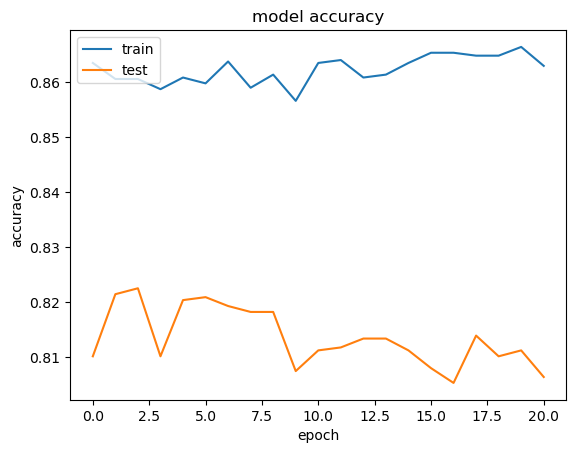

In [117]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

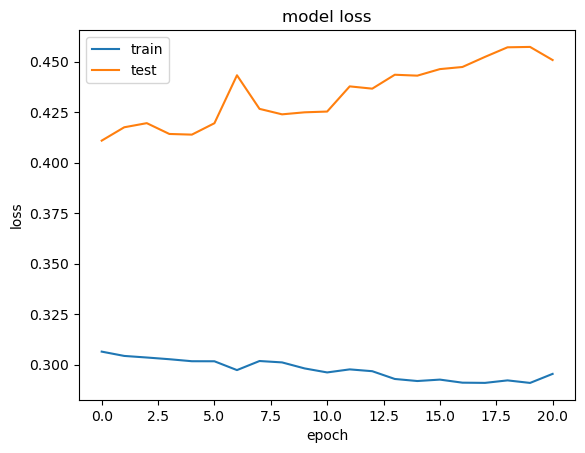

In [118]:
# summary history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()

#### Hyperparameter Tunning